In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter

In [2]:
ds = xr.open_zarr("data_fig4S.zarr/")

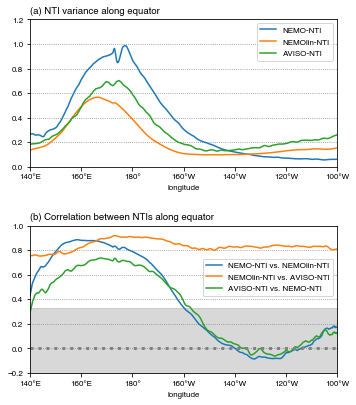

In [3]:
fig = plt.figure(figsize=(5.5,6.5))
plt.rcParams['font.size'] =8

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = fig.add_subplot(211)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ds.nti_nemo_var.plot(label='NEMO-NTI');
ds.nti_nemolin_var.plot(label='NEMOlin-NTI');
ds.nti_aviso_var.plot(label='AVISO-NTI');
plt.legend()
plt.title('(a) NTI variance along equator',loc='left')
plt.title('');
plt.xlim(140,260)
plt.ylim(0,1.2)
plt.ylabel("");
plt.xlabel('longitude');
plt.grid(color='grey',linestyle = ':',axis='y')


ax2 = fig.add_subplot(212)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
ds.corr_nti_nemo_nti_nemolin.plot(label='NEMO-NTI vs. NEMOlin-NTI')
ds.corr_nti_nemolin_nti_aviso.plot(label='NEMOlin-NTI vs. AVISO-NTI')
ds.corr_nti_aviso_nti_nemo.plot(label='AVISO-NTI vs. NEMO-NTI')
plt.legend(loc=7,bbox_to_anchor=(1, 0.65))
plt.ylim(-0.2,1)
plt.xlim(140,260)
plt.ylabel("");
plt.xlabel('longitude');
plt.axhline(y=0., c="0.5", ls=":", lw=3)
plt.grid(color='grey',linestyle = ':',axis='y')
plt.subplots_adjust(wspace =0, hspace = 0.4)
plt.fill_between(
    ds.corr_nti_aviso_nti_nemo.lon,
    -0.33, 0.33,
    color='0.5', alpha=0.3,
)
plt.title('(b) Correlation between NTIs along equator',loc='left')
plt.title('');

plt.savefig("figS4.pdf", format="pdf", bbox_inches="tight")
plt.show()